# We will be doing
1. pipeline
2. Hyper Parameters

## Models to be used
1. Logistic Classification
2. Random Forest
3. XGBoost
4. CatBoost
5. LGB


<a id='20'></a>
<font color = '#F08841'>
    Jump Direct to:

1. [CATBoosting 82.25% Accuracy](#0)    
    *          [Prediction Accuracy without Tunning](#2)
1. [XGBoost 79.22% Accuracy](#3)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Pipelines Creation
1. Data Preprocessing by using Standard Scaler
2. Reduce Dimension using PCA
3. Apply  Classifier

# Pipelines Perform Hyperparameter Tuning Using Grid SearchCV

### Will Check difference in result after Hyperparameter and before


In [ ]:
diabetes_df=pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
diabetes_df

In [ ]:
diabetes_df.info()

In [ ]:
# Check for Correlation 
sns.heatmap(diabetes_df.corr(), annot=True)

In [ ]:
#Pair plot
sns.pairplot(diabetes_df)

In [ ]:
# I feek There is a relationship between Glucose and Outcome

sns.regplot(x="Glucose", y="Outcome", data=diabetes_df)

In [ ]:
sns.regplot(x="Insulin", y="Outcome", data=diabetes_df)

In [ ]:
data=diabetes_df
data

# How to find the length of each column of Data Frame
## Checking value count of 0 for columns

In [ ]:
print("total number of rows : {0}".format(len(data)))
print("number of rows having 0 as Value for glucose: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("number of rows having 0 as Value for Pregnancies: {0}".format(len(data.loc[data['Pregnancies'] == 0])))
print("number of rows having 0 as Value for BloodPressure: {0}".format(len(data.loc[data['BloodPressure'] == 0])))
print("number of rows having 0 as Value for insulin: {0}".format(len(data.loc[data['Insulin'] == 0])))
print("number of rows having 0 as Value for bmi: {0}".format(len(data.loc[data['BMI'] == 0])))
print("number of rows having 0 as Value for DiabetesPedigreeFunction: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("number of rows having 0 as Value for age: {0}".format(len(data.loc[data['Age'] == 0])))
print("number of rows having 0 as Value for SkinThickness: {0}".format(len(data.loc[data['SkinThickness'] == 0])))

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') # in case wanna replace NaN with Mean

In [ ]:
X = data.drop('Outcome' , axis=1)
y = data['Outcome']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)


fill_values = SimpleImputer(missing_values=0, strategy="mean")  # In case replace 0 with mean

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

## Preparing Data for training

In [ ]:
target_df =diabetes_df['Outcome']

train_df = diabetes_df.drop(columns={'Outcome'}, axis =1)

In [ ]:
# Splits the dataset
X_train2,X_test2,y_train2,y_test2=train_test_split(train_df,target_df,test_size=0.3,random_state=0)

In [ ]:
# pipeline 1
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('lr_classifier',LogisticRegression(random_state=0))])

In [ ]:
# Pipeline 2

pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('dt_classifier',DecisionTreeClassifier())])

In [ ]:
# Pipeline 3

pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('rf_classifier',RandomForestClassifier())])

In [ ]:
## LEts make the list of pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest]

In [ ]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [ ]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train2, y_train2)

In [ ]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test2,y_test2)))

In [ ]:
# Print most accurate model

for i,model in enumerate(pipelines):
    if model.score(X_test2,y_test2)>best_accuracy:
        best_accuracy=model.score(X_test2,y_test2)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

In [ ]:
# Import the GridSerachCV

from sklearn.model_selection import GridSearchCV

In [ ]:
# Create a pipeline
pipe = Pipeline([("classifier", RandomForestClassifier())])
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2','l1'],
                 "classifier__C": np.logspace(0, 4, 10)
                 },
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2'],
                 "classifier__C": np.logspace(0, 4, 10),
                 "classifier__solver":['newton-cg','saga','sag','liblinear'] ##This solvers don't allow L1 penalty
                 },
                {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [10, 100, 1000],
                 "classifier__max_depth":[5,8,15,25,30,None],
                 "classifier__min_samples_leaf":[1,2,5,10,15,100],
                 "classifier__max_leaf_nodes": [2, 5,10]}]


# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model2 = gridsearch.fit(X_train2,y_train2)

In [ ]:
print(best_model2.best_estimator_)
print("The mean accuracy of the model is:",best_model2.score(X_test2,y_test2))

# Same Process but for Imputed data
## X_train, X_test, y_train, y_test

In [ ]:
print('Prediction score for original Data')

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train2, y_train2)
    
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test2,y_test2)))

In [ ]:
print('Prediction score for Imputed Data')

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train, y_train)
    
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

## After Hyper Parameter 

In [ ]:
# Appling it on imputed data

# Create a pipeline
pipe = Pipeline([("classifier", RandomForestClassifier())])
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2','l1'],
                 "classifier__C": np.logspace(0, 4, 10)
                 },
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2'],
                 "classifier__C": np.logspace(0, 4, 10),
                 "classifier__solver":['newton-cg','saga','sag','liblinear'] ##This solvers don't allow L1 penalty
                 },
                {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [10, 100, 1000],
                 "classifier__max_depth":[5,8,15,25,30,None],
                 "classifier__min_samples_leaf":[1,2,5,10,15,100],
                 "classifier__max_leaf_nodes": [2, 5,10]}]


# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)

In [ ]:
print('Original Data')
print(best_model2.best_estimator_)
print("The mean accuracy of the model is:",best_model2.score(X_test2,y_test2))

In [ ]:

print('Imputed Data')
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

# Boosting
## Now will Try boosting for prediction
1. XGBoost
2. Light Gradient Boost
3. CatBoost

<a id="3"></a>
<p style = "font-size : 25px; color : black ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ff6666; border-radius: 5px 5px;"><strong>XGBoost</strong></p>

In [ ]:
## Apply Algorithm

from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, y_train.ravel())

In [ ]:
predict_train_data = random_forest_model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

In [ ]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [ ]:
classifier=xgboost.XGBClassifier()

In [ ]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y.ravel())
timer(start_time) # timing ends here for "start_time" variable

In [ ]:
random_search.best_estimator_

In [ ]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=3,monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:

from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X_train,y_train.ravel(),cv=10)

# For original data
score_o=cross_val_score(classifier,X_train2,y_train2.ravel(),cv=10)


In [ ]:
score

In [ ]:
print('Original')
print(score_o.mean())
print("Imputed df")
print(score.mean())

In [ ]:
classifier.fit(X_train,y_train)
classifier.fit(X_train2,y_train2)

In [ ]:
y_pred=classifier.predict(X_test)
y_pred2=classifier.predict(X_test2)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm=confusion_matrix(y_test,y_pred)
score= accuracy_score(y_test,y_pred)

cm2=confusion_matrix(y_test2,y_pred2)
score2= accuracy_score(y_test2,y_pred2)
print("Score on Original Data")
print(cm2)
print(score2)

print("Score on Imputed Data")
print(cm)
print(score)

<a id="0"></a>
<p style = "font-size : 25px; color : black ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ff6666; border-radius: 5px 5px;"><strong>Categorical Boosting with RandomSearch CV </strong></p>


# A.K.A. CatBoosting
* CatBoost mostly takes care of **Most of the Data Preprocessing** like Missing values, 

In [ ]:
from sklearn.metrics import f1_score, accuracy_score

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
model_cb = CatBoostClassifier(task_type='GPU', iterations=100, 
                              random_state = 2021, 
                              eval_metric="F1")

In [ ]:
features = list(X_train2.columns)

In [ ]:
X_train2

In [ ]:

cat_features = data["Outcome"]

In [ ]:
model_cb.fit(X_train2, y_train2,plot=True, 
             eval_set=(X_test2, y_test2))

In [ ]:
y_pred = model_cb.predict(X_test)

In [ ]:
f1_score(y_test, y_pred)

In [ ]:
accuracy_score(y_test, y_pred)

# 82% Accuracy without Hyper Parameter Tuning.
### Will Check This again after Hyper Parameter Tuning

<a id="1"></a>
<p style = "font-size : 25px; color : black ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ff6666; border-radius: 5px 5px;"><strong>Accuracy CatBoost = 0.8225108225108225</strong><ul style = "font-size : 20px; color : black ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ff6666; border-radius: 5px 5px;"><li>XGBoost Accuracy : 0.7922077922077922 </li></ul></p>

# Notes for Better understanding
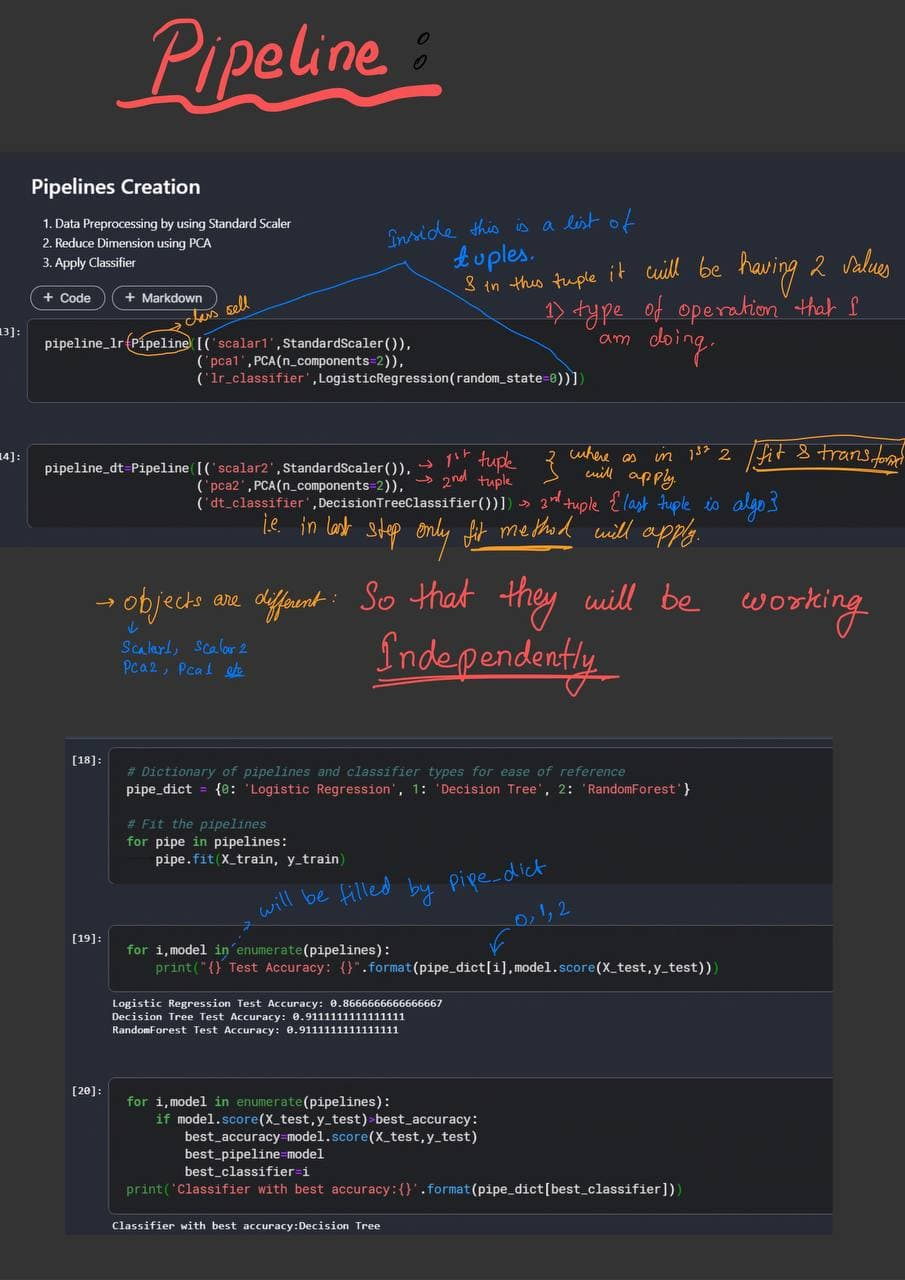

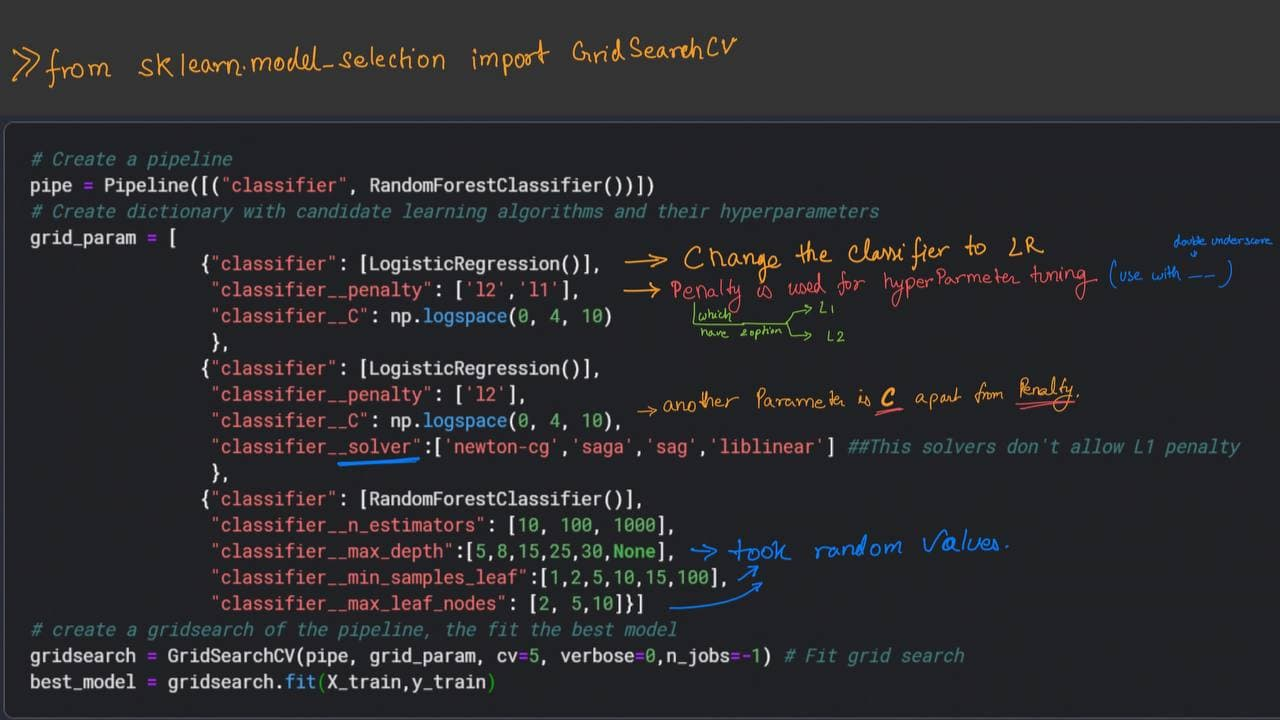

## Few Key points:
* No of n_jobs don't affect our accuracy

# Reference 
* [Source 1 Krish Naik github](https://github.com/krishnaik06/Pipelines-Using-Sklearn/blob/master/SklearnPipeline.ipynb)
* [Source 2 Krish explaining about Hyper Parameter Tuning](https://www.youtube.com/watch?v=DHxsNrL7Zfw)
* [Intro to CatBoosting](https://www.youtube.com/watch?v=zAXG1nUTdp0)